# Proyecto

https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification?select=predictive_maintenance.csv

## Descripción del proyecto.


Participantes:


*   De Jesús Martinez Carlos Alberto
*   Miguel Esaú Rivera Román
*   Ivan Tonathiu López Rosales



## **Librerías Importadas**

In [ ]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go  # Para gráficos interactivos

# Librerías para escalado y estandarización de datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Librerías para división de datos (entrenamiento y prueba)
from sklearn.model_selection import train_test_split

# Librerías para validación cruzada y optimización de modelos
from sklearn.model_selection import cross_val_score

# Librerías para evaluación de modelos (Regresión y Clasificación)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Librerías para modelos de aprendizaje automático - Regresión
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor

# Librerías para modelos de aprendizaje automático - Clasificación
from sklearn.ensemble import RandomForestClassifier

# Librerías para generación de datos sintéticos (para tratar desbalanceo)
from imblearn.over_sampling import SMOTE

# Librerías para PCA y clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # Evaluación de clusters

## **Carga y Exploración del Dataset**

### *Carga del dataset*

In [ ]:
# Importamos nuestro dataset
data = pd.read_csv("predictive_maintenance.csv")

### Filas y Columnas

In [ ]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Descripción general:
Nuestro dataset contiene información sobre el funcionamiento de distintos productos con variables como temperatura, velocidad de rotación, torque y desgaste de la herramienta. Algunas columnas son categóricas y pueden ser transformadas, mientras que otras pueden ser eliminadas por no aportar valor analítico.

### Informacion del dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Datos completos y sin valores faltantes:
Al observar la estructura del dataset, podemos confirmar que no existen valores faltantes en ninguna de las columnas. Todas las entradas en las 10 columnas están completas (10000 valores no nulos por columna). Esto significa que no será necesario realizar ninguna imputación de valores ni eliminar filas o columnas debido a datos ausentes. Esto facilita el proceso de análisis, ya que no debemos preocuparnos por la limpieza de datos relacionada con la falta de información.

## **Análisis Exploratorio de Datos**

### *Detección de desbalanceo*

#### Failure Type

In [ ]:
data['Failure Type'].value_counts()

,count
Failure Type,
No Failure,9652
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
Random Failures,18


**Desbalanceo en la variable 'Failure Type':**

El dataset presenta un desbalance significativo entre las clases de Failure Type, con una gran mayoría de registros en la categoría No Failure. Este desbalance puede afectar el rendimiento del modelo, ya que los algoritmos tienden a favorecer las clases más representadas. Para mitigar este problema, es recomendable aplicar técnicas de balanceo como  SMOTE (Synthetic Minority Over-sampling Technique), que generan muestras sintéticas de las clases minoritarias.

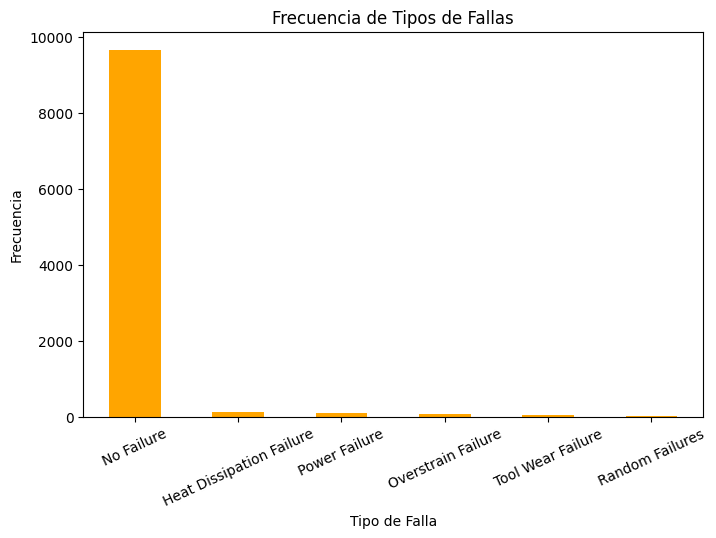

In [ ]:
data['Failure Type'].value_counts().plot(kind='bar', color='orange', figsize=(8, 5))

# Etiquetas y título
plt.xlabel("Tipo de Falla")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Tipos de Fallas")
plt.xticks(rotation=25)

# Mostrar la gráfica
plt.show()

**Gráfica de Failure Type:**

La gráfica muestra claramente el desbalanceo entre las clases de Failure Type, evidenciando cómo No Failure domina en comparación con las demás categorías de fallas. Este desbalance puede tener un impacto negativo en el rendimiento del modelo, ya que los algoritmos podrían sesgarse hacia la clase más representada.

#### "Target"

In [ ]:
data['Target'].value_counts()

,count
Target,
0,9661
1,339


**Desbalanceo en el target 'Failure' vs 'No Failure':**

En la variable Target, que indica si una máquina falló (1) o no (0), también se observa un fuerte desbalanceo, con una abrumadora mayoría de casos en los que no hay falla. Este desbalance podría afectar negativamente el rendimiento del modelo, por lo que es importante aplicar técnicas de balanceo de clases para mejorar la predicción de la clase minoritaria.

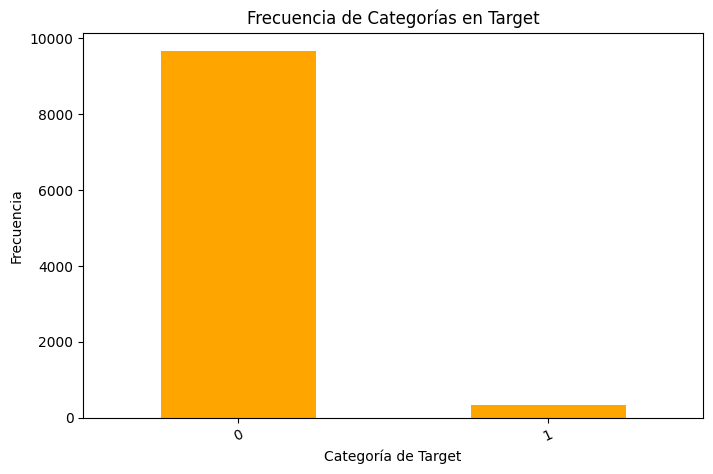

In [ ]:
data['Target'].value_counts().plot(kind='bar', color='orange', figsize=(8, 5))

# Etiquetas y título
plt.xlabel("Categoría de Target")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Categorías en Target")
plt.xticks(rotation=25)

# Mostrar la gráfica
plt.show()

**Gráfica del Target:**

La gráfica visualiza claramente el desbalanceo en la variable Target, donde la clase No Failure (0) domina sobre Failure (1). Este desbalance resalta la necesidad de aplicar técnicas de balanceo para mejorar el rendimiento del modelo.

### *Distribución de variables numericas*

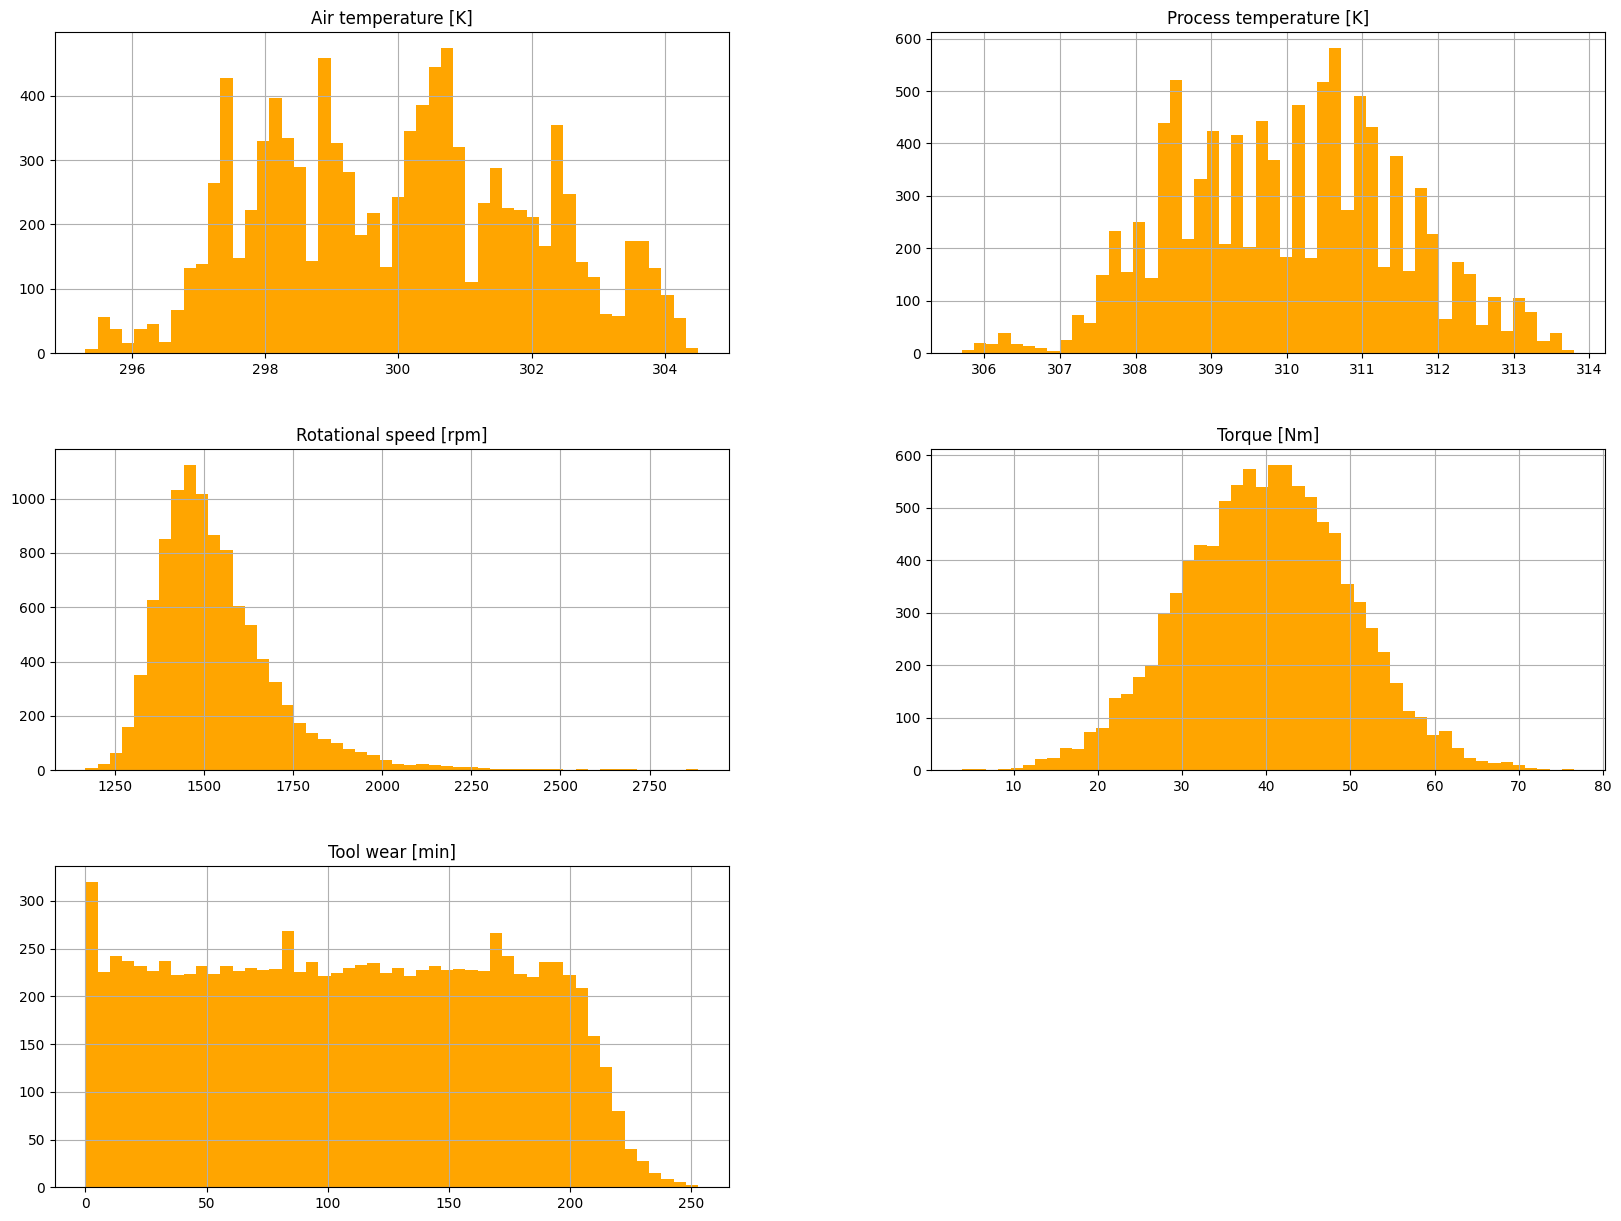

In [ ]:
data[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']].hist(bins=50, figsize=(20,15), color='orange')
plt.show()

# Mostrar el gráfico
plt.show()

**Gráfica de distribución de variables numéricas:**

La gráfica muestra la distribución de algunas de nuestras características numéricas más importantes, como Air temperature [K], Process temperature [K], Rotational speed [rpm] y Torque [Nm]. Estas variables podrían tener un gran impacto en la predicción de fallas en las máquinas, ya que reflejan aspectos clave del funcionamiento de los equipos.

### *Valores atipicos con BoxPlot*

**Identificación de valores atípicos con Boxplot:**

En esta sección, utilizamos boxplots para verificar la presencia de valores atípicos en nuestras variables numéricas. Los boxplots nos permiten visualizar la distribución de los datos y detectar posibles anomalías.

**Boxplots en color salmón:** Estos representan las variables que no contienen valores atípicos. La distribución de los datos se muestra dentro de los rangos esperados, sin ningún valor fuera de lo común.


---


**Boxplots en color rojo:** Estos muestran las variables que sí contienen valores atípicos. Los valores que se encuentran fuera de los límites del boxplot (los puntos que sobresalen) son considerados atípicos y podrían ser tratados dependiendo de su naturaleza.

#### Temperatura del aire

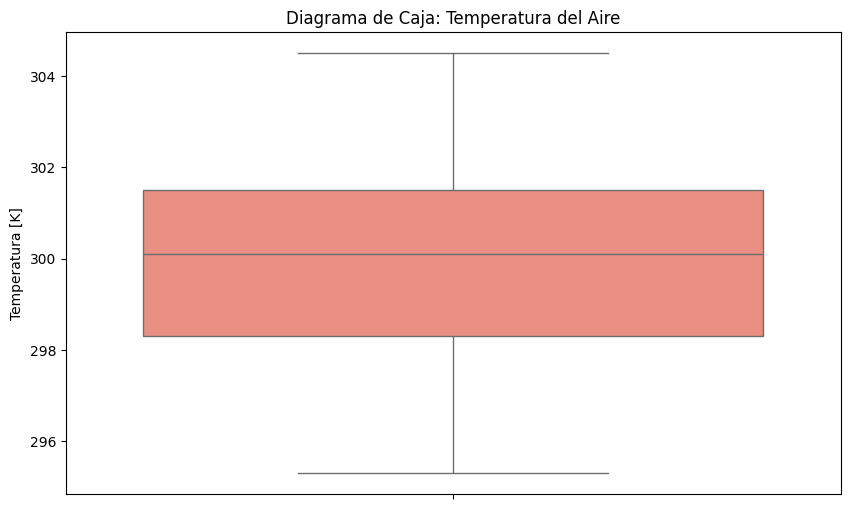

In [ ]:
# Crear un boxplot para visualizar valores atípicos en la temperatura del aire
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Air temperature [K]'], color='salmon')
plt.title('Diagrama de Caja: Temperatura del Aire')
plt.ylabel('Temperatura [K]')
plt.show()

**Sin valores atipicos**

#### Temperatura del proceso

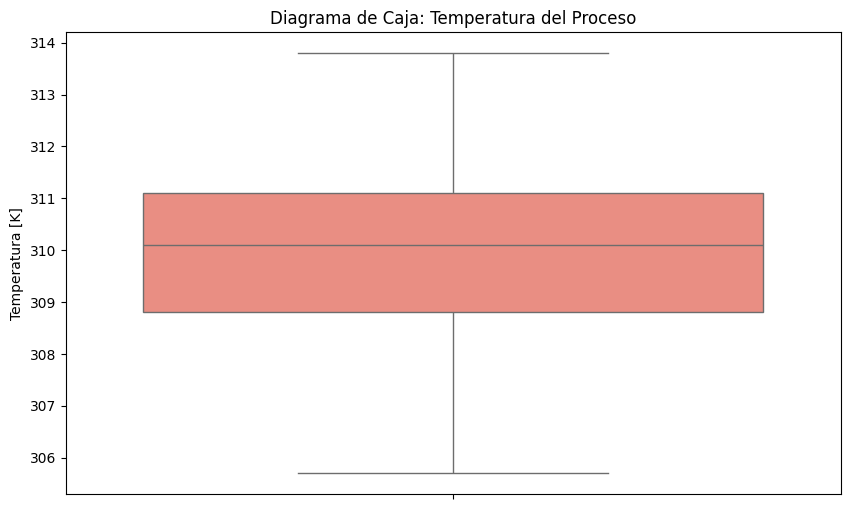

In [ ]:
# Crear un boxplot para visualizar valores atípicos en la temperatura del proceso
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Process temperature [K]'], color='salmon')
plt.title('Diagrama de Caja: Temperatura del Proceso')
plt.ylabel('Temperatura [K]')
plt.show()

**Sin valores atipicos**

#### Velocidad rotacional (Atipico)

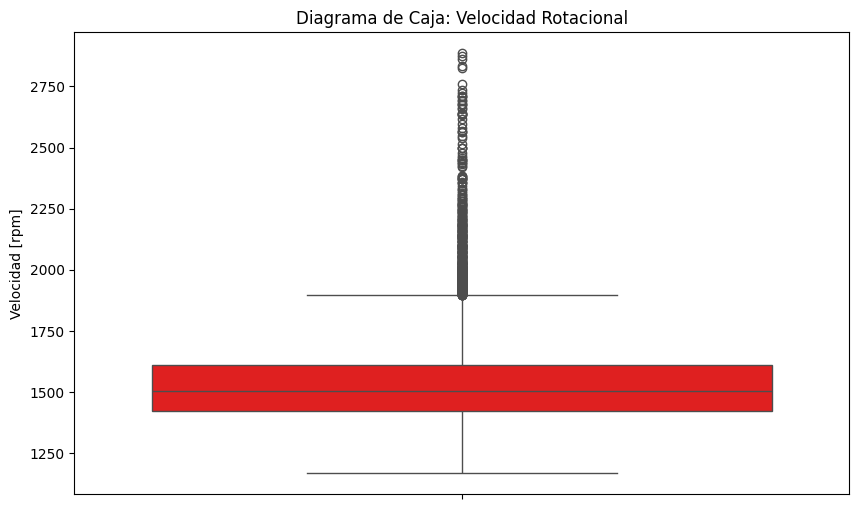

In [ ]:
# Crear un boxplot para visualizar valores atípicos en la velocidad rotacional
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Rotational speed [rpm]'], color="red")
plt.title('Diagrama de Caja: Velocidad Rotacional')
plt.ylabel('Velocidad [rpm]')
plt.show()

**Con valores atipicos**

In [ ]:
# Calcular cuartiles e IQR
Q1, Q3 = data['Rotational speed [rpm]'].quantile([0.25, 0.75])
IQR = Q3 - Q1

# Definir límites de valores atípicos
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = (data['Rotational speed [rpm]'] < lim_inf) | (data['Rotational speed [rpm]'] > lim_sup+200)
num_outliers = outliers.sum()

# Reemplazar valores atípicos
data['Rotational speed [rpm]'] = data['Rotational speed [rpm]'].clip(lim_inf, lim_sup)
num_reemplazados = num_outliers  # Ya que cada outlier se reemplaza

# Mostrar resultados
print(f"Cantidad de valores atípicos detectados: {num_outliers}")
print(f"Cantidad de valores reemplazados: {num_reemplazados}")

Cantidad de valores atípicos detectados: 154
Cantidad de valores reemplazados: 154


#### Torque

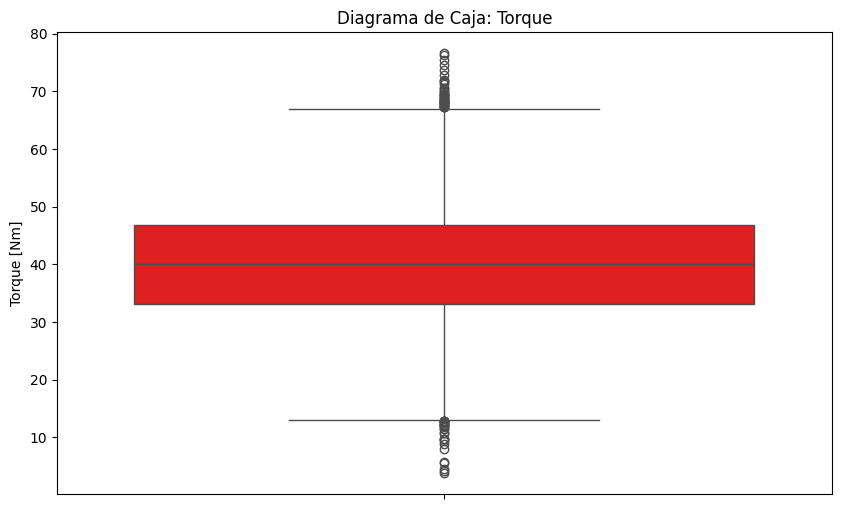

In [ ]:
# Crear un boxplot para visualizar valores atípicos en el torque
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Torque [Nm]'], color='red')
plt.title('Diagrama de Caja: Torque')
plt.ylabel('Torque [Nm]')
plt.show()

**Con valores atipicos**

In [ ]:
# Calcular cuartiles e IQR
Q1, Q3 = data['Torque [Nm]'].quantile([0.25, 0.75])
IQR = Q3 - Q1

# Definir límites de valores atípicos
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = (data['Torque [Nm]'] < lim_inf) | (data['Torque [Nm]'] > lim_sup)
num_outliers = outliers.sum()

# Reemplazar valores atípicos
data['Torque [Nm]'] = data['Torque [Nm]'].clip(lim_inf, lim_sup)
num_reemplazados = num_outliers  # Cada outlier es reemplazado

# Mostrar resultados
print(f"Cantidad de valores atípicos detectados: {num_outliers}")
print(f"Cantidad de valores reemplazados: {num_reemplazados}")

Cantidad de valores atípicos detectados: 69
Cantidad de valores reemplazados: 69


#### Desgaste de la herramienta

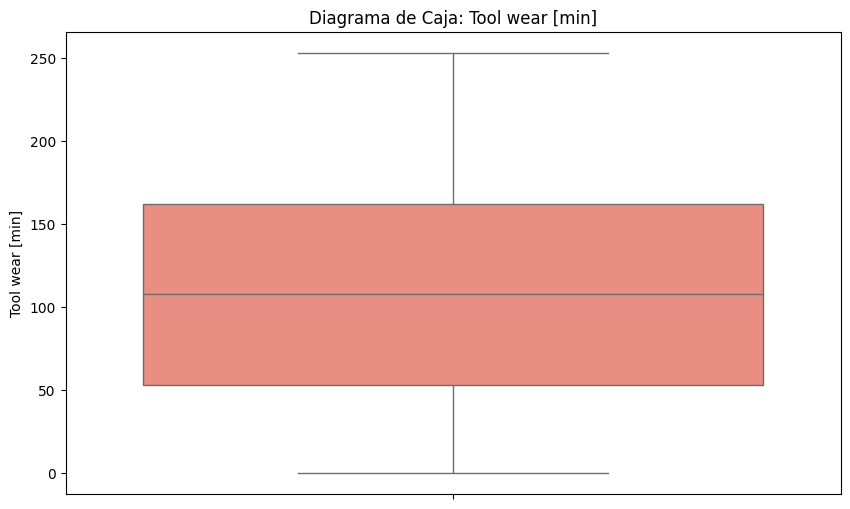

In [ ]:
# Crear un boxplot para visualizar valores atípicos Desgaste de la herramienta
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Tool wear [min]'], color='salmon')
plt.title('Diagrama de Caja: Tool wear [min]')
plt.ylabel('Tool wear [min]')
plt.show()

**Sin valores atipicos**

## **Limpieza de datos**

### *Verificación de valores nulos*

> Agregar bloque entrecomillado



In [ ]:
data.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


En esta etapa, comenzamos verificando la presencia de valores nulos utilizando data.isnull().sum(). Sin embargo, como confirmamos previamente que no existen valores nulos en nuestro conjunto de datos, no será necesario realizar ningún tratamiento para estos. Esto simplifica el proceso de limpieza y permite continuar con el análisis sin preocupaciones adicionales sobre datos faltantes.

### *Eliminación de columnas irrelevantes*

In [ ]:
data = data.drop(columns=["UDI", "Product ID"])

# Mostramos como quedaria nuestro dataset
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551.0,42.8,0,0,No Failure
1,L,298.2,308.7,1408.0,46.3,3,0,No Failure
2,L,298.1,308.5,1498.0,49.4,5,0,No Failure
3,L,298.2,308.6,1433.0,39.5,7,0,No Failure
4,L,298.2,308.7,1408.0,40.0,9,0,No Failure


En esta fase, eliminaremos columnas que no aportan valor significativo al análisis ni al modelo predictivo, como UDI y Product ID. Estas columnas no son relevantes para la predicción de fallas y su eliminación ayudará a simplificar el conjunto de datos, mejorando la eficiencia en el proceso de modelado.

## **Preprocesamiento de Datos.**

### Mapeo de targets

En esta sección, estamos mapeando nuestros targets para facilitar su procesamiento por parte de los modelos. Optamos por realizar un mapeo manual en lugar de utilizar One-Hot Encoding o Label Encoding, ya que consideramos que es más cómodo y eficiente en nuestro caso. El One-Hot Encoding no sería adecuado debido a la naturaleza de nuestras variables, mientras que Label Encoding podría ser reemplazado por mapeo manual, ya que las variables categóricas a mapear son pocas y simples.

In [ ]:
# Minutos de desgaste
data['Type'] = data['Type'].map({'L': 2, 'M': 3, 'H': 5})


# Aplicar Label Encoding
data['Failure Type'] = data['Failure Type'].map({
    "No Failure": 1,
    "Heat Dissipation Failure": 2,
    "Power Failure": 3,
    "Overstrain Failure": 4,
    "Tool Wear Failure": 5,
    "Random Failures": 6
})

In [ ]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,3,298.1,308.6,1551.0,42.8,0,0,1
1,2,298.2,308.7,1408.0,46.3,3,0,1
2,2,298.1,308.5,1498.0,49.4,5,0,1
3,2,298.2,308.6,1433.0,39.5,7,0,1
4,2,298.2,308.7,1408.0,40.0,9,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  float64
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 625.1 KB


## **Modelos de Regresión**

### *Análisis Exploratorio de Datos*

In [ ]:
# Calcular la matriz de correlación
correlacion_matrix = data.corr()

# Extraer la correlación de las features con 'Rotational speed [rpm]'
correlacion_target = correlacion_matrix["Rotational speed [rpm]"].sort_values(ascending=False)

# Mostrar las correlaciones
correlacion_target


,Rotational speed [rpm]
Rotational speed [rpm],1.000000
Air temperature [K],0.021305
Process temperature [K],0.019892
Tool wear [min],0.002496
Type,-0.001903
Failure Type,-0.088975
Target,-0.130467
Torque [Nm],-0.911734


#### HeatMap

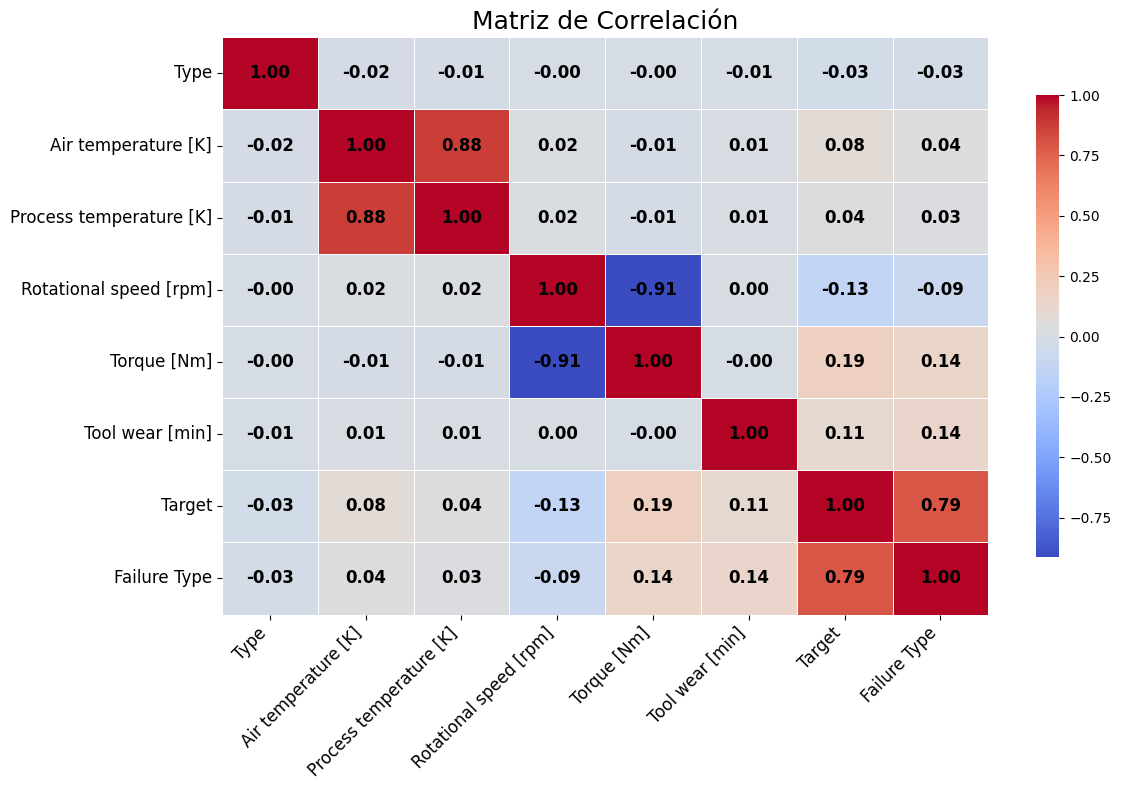

In [ ]:
plt.figure(figsize=(12, 8))

sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            cbar_kws={"shrink": 0.8}, annot_kws={"size": 12, "weight": 'bold', "color": 'black'})

plt.title("Matriz de Correlación", fontsize=18, color='black')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()

plt.show()

Podemos ver que hay algunas correlaciones muy bajas y algunas correlaciones negativas la cual ocuparemos para modificar las features que ocuparemos.

Torque [Nm]: -0.911734 (correlación negativa fuerte)

Air temperature [K]: 0.021305 (correlación muy baja)

Process temperature [K]: 0.019892 (correlación muy baja)

### *Preparación y Preprocesamiento de Datos*

#### Seleccion y división de features

In [ ]:
# Variables independientes (características)
X_regresion = data[['Torque [Nm]', 'Air temperature [K]', 'Process temperature [K]']]

# Variable dependiente (objetivo)
y_regresion = data['Rotational speed [rpm]']

#### Escalado de Datos


Escalamos los datos para que nuestros modelos puedan leerlo de una manera mas sencilla.

En nuestro caso utilizaremos conforme nos de mejor precision nuestro modelos entre MinMaxScaler y StandarScaler

In [ ]:
# Creamos una instancia para escalar con Min-Max
scaler_min_max_r = MinMaxScaler()
# Creamos una instancia para escalar con Min-Max
scaler_standar_r = StandardScaler() # Este es el que ocuparemos

# Ajustar y transformar los datos
X_escalado_min_max_r = scaler_min_max_r.fit_transform(X_regresion)  # X es el conjunto de datos y esta escalado con MinMaxScaler()
X_escalado_standar_r = scaler_standar_r.fit_transform(X_regresion)  # X es el conjunto de datos y esta escalado con StandardScaler()

#### Division de data

Insertamos nuestros datos escalados y luego dividimos dichos datos conforme vayamos probando la precision.

In [ ]:
# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_escalado_standar_r, y_regresion, test_size=0.3, random_state=42)

### *Instancia y creacion del modelo*

In [ ]:
# Modelo de regresion con RandomForestRegressor

model_rf_r = RandomForestRegressor(
    n_estimators=400,      # Aumentamos el número de árboles para mejorar la estabilidad
    max_depth=5,           # Reducimos la profundidad para evitar overfitting
    min_samples_split=20,  # Requiere más muestras para hacer una división
    min_samples_leaf=10,   # Cada hoja debe tener al menos 10 muestras
    max_features=0.7,      # Reducimos el número de características usadas por árbol
    random_state=42
)

# Modelo de regresion con XGBRegressor

model_xgb_r = XGBRegressor(
    n_estimators=500,   # Mantiene el número de árboles
    learning_rate=0.05,  # Velocidad de aprendizaje moderada
    max_depth=1,        # Aumenta ligeramente la profundidad para captar más patrones
    reg_lambda=10,       # Regularización L2 (reduce pesos grandes)
    reg_alpha=5,      # Regularización L1 (elimina pesos innecesarios)
    subsample=0.8,      # Usa el 80% de los datos por árbol
    colsample_bytree=0.8, # Usa el 80% de las características en cada árbol
    random_state=42
)

# Modelo de regresion con GradientBoostingRegressor

model_gb_r = GradientBoostingRegressor(
    n_estimators=400,              # Incrementa el número de árboles
    max_depth=5,                    # Mantén la profundidad moderada
    learning_rate=0.01,             # Reduce la tasa de aprendizaje
    random_state=42,                # Semilla aleatoria para reproducibilidad
    min_samples_split=20,           # Aumenta el número mínimo de muestras para dividir
    min_samples_leaf=10,            # Aumenta el número mínimo de muestras en cada hoja
    subsample=0.8,                  # Usa el 80% de los datos para cada árbol
    max_features="sqrt"             # Usa la raíz cuadrada de las características
)

En este caso tambien agregamos otros hiperparametros como regulizacion, tiempo de entrenamiento, etc.
Para que almenos ligeramente

### *Entrenamiento del modelo*

Entrenamos nuestro modelo con los datos divididos en nuetros caso un 70% de entrenamiento tanto de X y Y

In [ ]:
# Entrenamos el modelo con RandomForestRegressor
model_rf_r.fit(X_train_r, y_train_r)

RandomForestRegressor(max_depth=5, max_features=0.7, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=400, random_state=42)

In [ ]:
# Entrenamos el modelo con XGBRegressor
model_xgb_r.fit(X_train_r, y_train_r)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Entrenamos el modelo con GradientBoostingRegressor
model_gb_r.fit(X_train_r, y_train_r)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          min_samples_leaf=10, min_samples_split=20,
                          n_estimators=400, random_state=42, subsample=0.8)

### *Predicciones*

RandomForestRegressor

In [ ]:
# Predicción Test con Random Forest
y_test_pred_rf_r = model_rf_r.predict(X_test_r)
# Predicción Entrenamiento
y_train_pred_rf_r = model_rf_r.predict(X_train_r)

XGBRegressor

In [ ]:
# Predicción Test con XGBRegresor
y_test_pred_xgb_r = model_xgb_r.predict(X_test_r)
# Predicción Entrenamiento
y_train_pred_xgb_r = model_xgb_r.predict(X_train_r)

GradientBoostingRegressor

In [ ]:
# Predicción Test con GradientBoostingRegressor
y_test_pred_gb_r = model_gb_r.predict(X_test_r)
# Predicción Entrenamiento
y_train_pred_gb_r = model_gb_r.predict(X_train_r)

### *Graficas*

En esta grafica veremos que tanto se separa nuestros valores de nuestro modelo. Viendo que tan preciso fue.

#### *RandomForestRegressor*

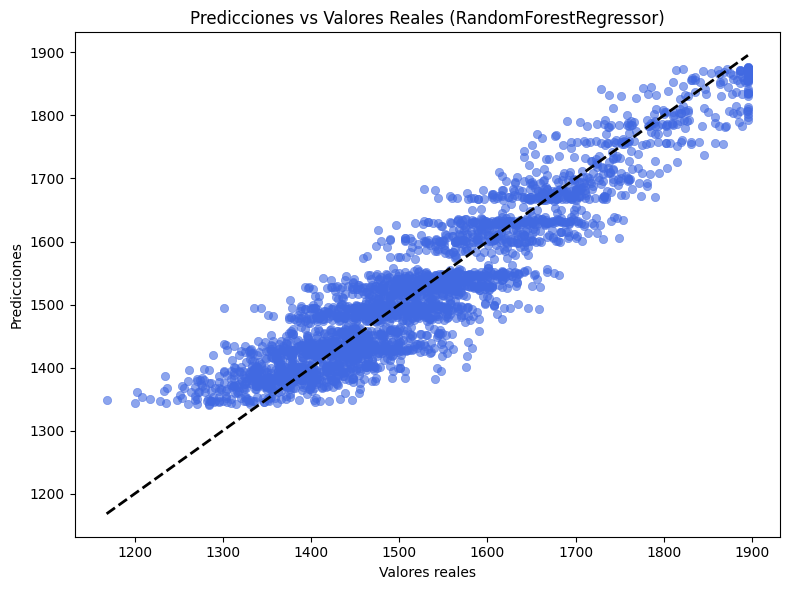

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=y_test_r,
    y=y_test_pred_rf_r,
    alpha=0.6,
    color='royalblue',
    edgecolor=None
)

plt.plot(
    [y_test_r.min(), y_test_r.max()],
    [y_test_r.min(), y_test_r.max()],
    '--',
    color='black',
    lw=2
)

plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (RandomForestRegressor)')
plt.tight_layout()
plt.show()

#### *XGBRegressor*

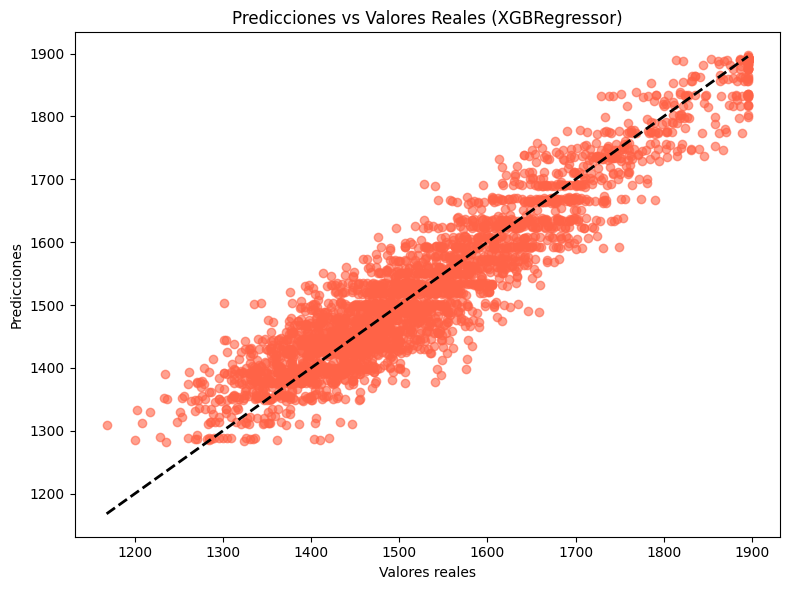

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    y_test_r,
    y_test_pred_xgb_r,
    alpha=0.6,
    color='tomato',
    edgecolor=None
)
plt.plot(
    [y_test_r.min(), y_test_r.max()],
    [y_test_r.min(), y_test_r.max()],
    '--',
    color='black',
    lw=2
)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (XGBRegressor)')
plt.tight_layout()
plt.show()

#### *GradientBoostingRegressor*

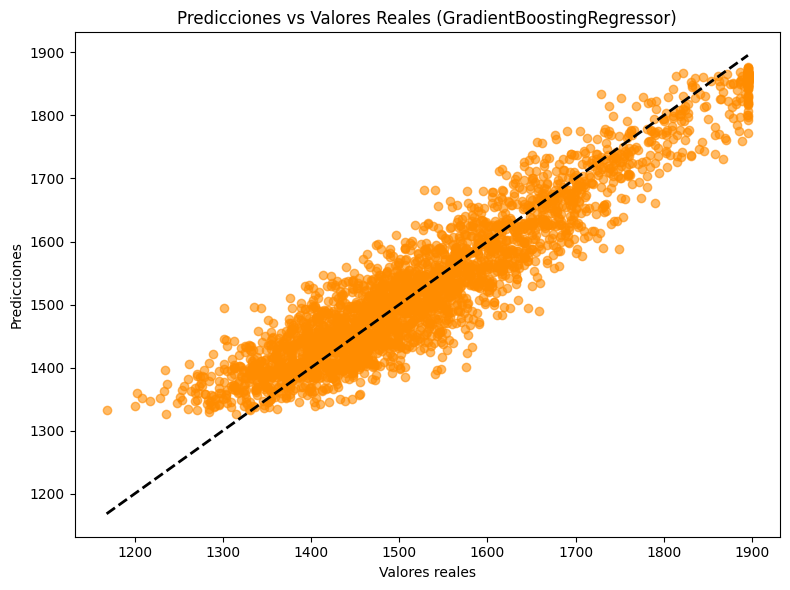

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    y_test_r,
    y_test_pred_gb_r,
    alpha=0.6,
    color='darkorange',
    edgecolor=None
)
plt.plot(
    [y_test_r.min(), y_test_r.max()],
    [y_test_r.min(), y_test_r.max()],
    '--',
    color='black',
    lw=2
)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (GradientBoostingRegressor)')
plt.tight_layout()
plt.show()

### *Metricas*

Ahora utilizaremos metricas como MAE, MSE, RMSE y R2 para saber que tanto se equivoca nuestro modelo, si es que tenemos errores grandes y la "precision" de nuestro modelo.

#### *RandomForestRegressor*

In [ ]:
# Cálculo de métricas para entrenamiento
mae_train_xgb_r = mean_absolute_error(y_train_r, y_train_pred_xgb_r)
mse_train_xgb_r = mean_squared_error(y_train_r, y_train_pred_xgb_r)
rmse_train_xgb_r = np.sqrt(mse_train_xgb_r)
r2_train_xgb_r = r2_score(y_train_r, y_train_pred_xgb_r)

# Cálculo de métricas para prueba
mae_test_xgb_r = mean_absolute_error(y_test_r, y_test_pred_xgb_r)
mse_test_xgb_r = mean_squared_error(y_test_r, y_test_pred_xgb_r)
rmse_test_xgb_r = np.sqrt(mse_test_xgb_r)
r2_test_xgb_r = r2_score(y_test_r, y_test_pred_xgb_r)

# Imprimir el reporte
print("Reporte de Evaluación del Modelo de Regresión:")
print("Entrenamiento:")
print(f"  MAE: {mae_train_xgb_r:.4f}")
print(f"  MSE: {mse_train_xgb_r:.4f}")
print(f"  RMSE: {rmse_train_xgb_r:.4f}")
print(f"  R^2 Score: {r2_train_xgb_r:.4f}")

print("\nPrueba:")
print(f"  MAE: {mae_test_xgb_r:.4f}")
print(f"  MSE: {mse_test_xgb_r:.4f}")
print(f"  RMSE: {rmse_test_xgb_r:.4f}")
print(f"  R^2 Score: {r2_test_xgb_r:.4f}")

Reporte de Evaluación del Modelo de Regresión:
Entrenamiento:
  MAE: 38.0690
  MSE: 2338.4352
  RMSE: 48.3574
  R^2 Score: 0.8946

Prueba:
  MAE: 39.1466
  MSE: 2495.8933
  RMSE: 49.9589
  R^2 Score: 0.8867


#### *XGBRegressor*

In [ ]:
# Cálculo de métricas para entrenamiento
mae_train_rf_r = mean_absolute_error(y_train_r, y_train_pred_rf_r)
mse_train_rf_r = mean_squared_error(y_train_r, y_train_pred_rf_r)
rmse_train_rf_r = np.sqrt(mse_train_rf_r)
r2_train_rf_r = r2_score(y_train_r, y_train_pred_rf_r)

# Cálculo de métricas para prueba
mae_test_rf_r = mean_absolute_error(y_test_r, y_test_pred_rf_r)
mse_test_rf_r = mean_squared_error(y_test_r, y_test_pred_rf_r)
rmse_test_rf_r = np.sqrt(mse_test_rf_r)
r2_test_rf_r = r2_score(y_test_r, y_test_pred_rf_r)

# Imprimir el reporte
print("Reporte de Evaluación del Modelo de Regresión:")
print("Entrenamiento:")
print(f"  MAE: {mae_train_rf_r:.4f}")
print(f"  MSE: {mse_train_rf_r:.4f}")
print(f"  RMSE: {rmse_train_rf_r:.4f}")
print(f"  R^2 Score: {r2_train_rf_r:.4f}")

print("\nPrueba:")
print(f"  MAE: {mae_test_rf_r:.4f}")
print(f"  MSE: {mse_test_rf_r:.4f}")
print(f"  RMSE: {rmse_test_rf_r:.4f}")
print(f"  R^2 Score: {r2_test_rf_r:.4f}")

Reporte de Evaluación del Modelo de Regresión:
Entrenamiento:
  MAE: 39.1591
  MSE: 2406.6995
  RMSE: 49.0581
  R^2 Score: 0.8915

Prueba:
  MAE: 40.3533
  MSE: 2578.7137
  RMSE: 50.7810
  R^2 Score: 0.8829


#### *GradientBoostingRegressor*

In [ ]:
# Cálculo de métricas para entrenamiento
mae_train_gbm_r = mean_absolute_error(y_train_r, y_train_pred_gb_r)
mse_train_gbm_r = mean_squared_error(y_train_r, y_train_pred_gb_r)
rmse_train_gbm_r = np.sqrt(mse_train_gbm_r)
r2_train_gbm_r = r2_score(y_train_r, y_train_pred_gb_r)

# Cálculo de métricas para prueba
mae_test_gbm_r = mean_absolute_error(y_test_r, y_test_pred_gb_r)
mse_test_gbm_r = mean_squared_error(y_test_r, y_test_pred_gb_r)
rmse_test_gbm_r = np.sqrt(mse_test_gbm_r)
r2_test_gbm_r = r2_score(y_test_r, y_test_pred_gb_r)

# Imprimir el reporte
print("Reporte de Evaluación del Modelo de Regresión:")
print("Entrenamiento:")
print(f"  MAE: {mae_train_gbm_r:.4f}")
print(f"  MSE: {mse_train_gbm_r:.4f}")
print(f"  RMSE: {rmse_train_gbm_r:.4f}")
print(f"  R^2 Score: {r2_train_gbm_r:.4f}")

print("\nPrueba:")
print(f"  MAE: {mae_test_gbm_r:.4f}")
print(f"  MSE: {mse_test_gbm_r:.4f}")
print(f"  RMSE: {rmse_test_gbm_r:.4f}")
print(f"  R^2 Score: {r2_test_gbm_r:.4f}")

Reporte de Evaluación del Modelo de Regresión:
Entrenamiento:
  MAE: 38.3935
  MSE: 2292.5130
  RMSE: 47.8802
  R^2 Score: 0.8966

Prueba:
  MAE: 40.9753
  MSE: 2626.4062
  RMSE: 51.2485
  R^2 Score: 0.8808


### *Votacion Suave*

In [ ]:
from sklearn.ensemble import VotingRegressor

# Crear el modelo de votación suave
model_votacion_suave_r = VotingRegressor(estimators=[
    ('rf', model_rf_r),
    ('xgb', model_xgb_r),
    ('gbr', model_gb_r)
])

# Entrenamiento
model_votacion_suave_r.fit(X_train_r, y_train_r)

# Predicción en el conjunto de entrenamiento y prueba
predicciones_train_vs_r = model_votacion_suave_r.predict(X_train_r)
predicciones_test_vs_r = model_votacion_suave_r.predict(X_test_r)

# Calcular las métricas para el conjunto de entrenamiento
mae_train_vs_r = mean_absolute_error(y_train_r, predicciones_train_vs_r)
mse_train_vs_r = mean_squared_error(y_train_r, predicciones_train_vs_r)
rmse_train_vs_r = np.sqrt(mse_train_vs_r)
r2_train_vs_r = r2_score(y_train_r, predicciones_train_vs_r)

# Calcular las métricas para el conjunto de prueba
mae_test_vs_r = mean_absolute_error(y_test_r, predicciones_test_vs_r)
mse_test_vs_r = mean_squared_error(y_test_r, predicciones_test_vs_r)
rmse_test_vs_r = np.sqrt(mse_test_vs_r)
r2_test_vs_r = r2_score(y_test_r, predicciones_test_vs_r)

# Imprimir el reporte
print("Reporte de Evaluación del Modelo de Votación Suave:")

# Métricas de Entrenamiento
print("\nEntrenamiento:")
print(f"  MAE: {mae_train_vs_r:.4f}")
print(f"  MSE: {mse_train_vs_r:.4f}")
print(f"  RMSE: {rmse_train_vs_r:.4f}")
print(f"  R^2 Score: {r2_train_vs_r:.4f}")

# Métricas de Prueba
print("\nPrueba:")
print(f"  MAE: {mae_test_vs_r:.4f}")
print(f"  MSE: {mse_test_vs_r:.4f}")
print(f"  RMSE: {rmse_test_vs_r:.4f}")
print(f"  R^2 Score: {r2_test_vs_r:.4f}")

Reporte de Evaluación del Modelo de Votación Suave:

Entrenamiento:
  MAE: 38.2871
  MSE: 2308.1421
  RMSE: 48.0431
  R^2 Score: 0.8959

Prueba:
  MAE: 39.9073
  MSE: 2529.0891
  RMSE: 50.2900
  R^2 Score: 0.8852


In [ ]:
import csv

# Resultados de las métricas ya calculadas
resultados = [
    ["Conjunto", "Métrica", "Valor"],
    ["Entrenamiento", "MAE", mae_train_vs_r],
    ["Entrenamiento", "MSE", mse_train_vs_r],
    ["Entrenamiento", "RMSE", rmse_train_vs_r],
    ["Entrenamiento", "R²", r2_train_vs_r],
    ["Prueba", "MAE", mae_test_vs_r],
    ["Prueba", "MSE", mse_test_vs_r],
    ["Prueba", "RMSE", rmse_test_vs_r],
    ["Prueba", "R²", r2_test_vs_r]
]

# Escribir los resultados en un archivo CSV
with open('resultados_votacion_suave.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(resultados)

print("Los resultados se han guardado en 'resultados_votacion_suave.csv'.")

Los resultados se han guardado en 'resultados_votacion_suave.csv'.


## **Modelo Clasificación - Falla**

### Seleccion y división de features

In [ ]:
# Separamos nuestro target de nuestras features para hacerle smote por separado.
x_clasificacion_uno_rf = data.drop(columns=['Failure Type', 'Target'])
y_clasificacion_uno_rf = data['Target']  # Variable objetivo | No Failure: 0 / Failure:1

### Smote

In [ ]:
# Aplicar SMOTE
smote_uno_rf = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled_uno_rf, y_resampled_uno_rf = smote_uno_rf.fit_resample(x_clasificacion_uno_rf, y_clasificacion_uno_rf)

# Convertir de nuevo a DataFrame
data_resampled_uno_rf = pd.DataFrame(x_resampled_uno_rf, columns=x_clasificacion_uno_rf.columns)
data_resampled_uno_rf['Target'] = y_resampled_uno_rf

# Verificar el balance después de aplicar SMOTE
print(data_resampled_uno_rf['Target'].value_counts())

# Variables a ocupar para el smote
x_clasificacion_smote_uno_rf = data_resampled_uno_rf.drop(columns=['Target'])
y_clasificacion_smote_uno_rf = data_resampled_uno_rf['Target']

Target
0    9661
1    9661
Name: count, dtype: int64


### **Division de data**

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba en 70% de entrenamiento y 30% prueba
X_train_c_uno, X_test_c_uno, y_train_c_uno, y_test_c_uno = train_test_split(
    x_clasificacion_smote_uno_rf, y_clasificacion_smote_uno_rf, test_size=0.3, random_state=42
)

### *Instancia y creación del modelo*

In [ ]:
# Crear el modelo Random Forest utilizando "Target como Objetivo"
modelo_rf_c_uno = RandomForestClassifier(
    n_estimators=75,   # Reduce el número de árboles
    max_depth=10,      # Limita la profundidad de los árboles
    min_samples_split=5,  # Evita divisiones con muy pocos datos
    min_samples_leaf=3,   # Cada hoja debe tener al menos 3 muestras
    max_features='sqrt',  # Reduce las características usadas en cada división
    random_state=42
)

### *Entrenamiento del modelo*

In [ ]:
# Entrenar el modelo
modelo_rf_c_uno.fit(X_train_c_uno, y_train_c_uno)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=75, random_state=42)

### *Predicciones*

In [ ]:
# Predecir con el modelo en entrenamiento y prueba
y_train_pred_c_uno = modelo_rf_c_uno.predict(X_train_c_uno)
y_test_pred_c_uno = modelo_rf_c_uno.predict(X_test_c_uno)

### *Metricas*

In [ ]:
# Diccionario con los mensajes correspondientes
failure_messages_c_uno = {
    0: "No Failure",
    1: "Failure"
}

# Evaluar el modelo en entrenamiento
accuracy_train_c_uno = accuracy_score(y_train_c_uno, y_train_pred_c_uno)
print("Entrenamiento:")
print(f"  Accuracy: {accuracy_train_c_uno:.4f}")
# Reemplazar los números de clase por los mensajes
train_report_c_uno = classification_report(y_train_c_uno, y_train_pred_c_uno, target_names=[failure_messages_c_uno[i] for i in range(2)])
print(train_report_c_uno)

# Evaluar el modelo en prueba
accuracy_test_c_uno = accuracy_score(y_test_c_uno, y_test_pred_c_uno)
print("\nPrueba:")
print(f"  Accuracy: {accuracy_test_c_uno:.4f}")
# Reemplazar los números de clase por los mensajes
test_report_c_uno = classification_report(y_test_c_uno, y_test_pred_c_uno, target_names=[failure_messages_c_uno[i] for i in range(2)])
print(test_report_c_uno)


Entrenamiento:
  Accuracy: 0.9692
              precision    recall  f1-score   support

  No Failure       0.98      0.96      0.97      6760
     Failure       0.96      0.98      0.97      6765

    accuracy                           0.97     13525
   macro avg       0.97      0.97      0.97     13525
weighted avg       0.97      0.97      0.97     13525


Prueba:
  Accuracy: 0.9584
              precision    recall  f1-score   support

  No Failure       0.98      0.94      0.96      2901
     Failure       0.94      0.98      0.96      2896

    accuracy                           0.96      5797
   macro avg       0.96      0.96      0.96      5797
weighted avg       0.96      0.96      0.96      5797



In [ ]:
import csv
from sklearn.metrics import accuracy_score, classification_report

# Diccionario con los mensajes correspondientes
failure_messages_c_uno = {
    0: "No Failure",
    1: "Failure"
}

# Evaluar el modelo en entrenamiento
accuracy_train_c_uno = accuracy_score(y_train_c_uno, y_train_pred_c_uno)
train_report_c_uno = classification_report(y_train_c_uno, y_train_pred_c_uno, target_names=[failure_messages_c_uno[i] for i in range(2)], output_dict=True)

# Evaluar el modelo en prueba
accuracy_test_c_uno = accuracy_score(y_test_c_uno, y_test_pred_c_uno)
test_report_c_uno = classification_report(y_test_c_uno, y_test_pred_c_uno, target_names=[failure_messages_c_uno[i] for i in range(2)], output_dict=True)

# Crear la estructura del CSV
resultados = [
    ["Conjunto", "Clasificación", "Valor", "Clasificación2"],  # Título de las columnas
    ["Entrenamiento", "Accuracy", accuracy_train_c_uno, "N/A"]  # Accuracy general (entrenamiento)
]

# Agregar métricas de clasificación para entrenamiento
for label in failure_messages_c_uno.values():
    train_metrics = train_report_c_uno[label]
    resultados.append(["Entrenamiento", label, train_metrics["f1-score"], "Clasificación1"])

# Agregar las métricas de prueba
resultados.append(["Prueba", "Accuracy", accuracy_test_c_uno, "N/A"])

for label in failure_messages_c_uno.values():
    test_metrics = test_report_c_uno[label]
    resultados.append(["Prueba", label, test_metrics["f1-score"], "Clasificación1"])

# Escribir los resultados en un archivo CSV
with open('resultados_clasificacion1.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(resultados)

print("Los resultados se han guardado en 'resultados_clasificacion1.csv'.")


Los resultados se han guardado en 'resultados_clasificacion1.csv'.


### Grafica

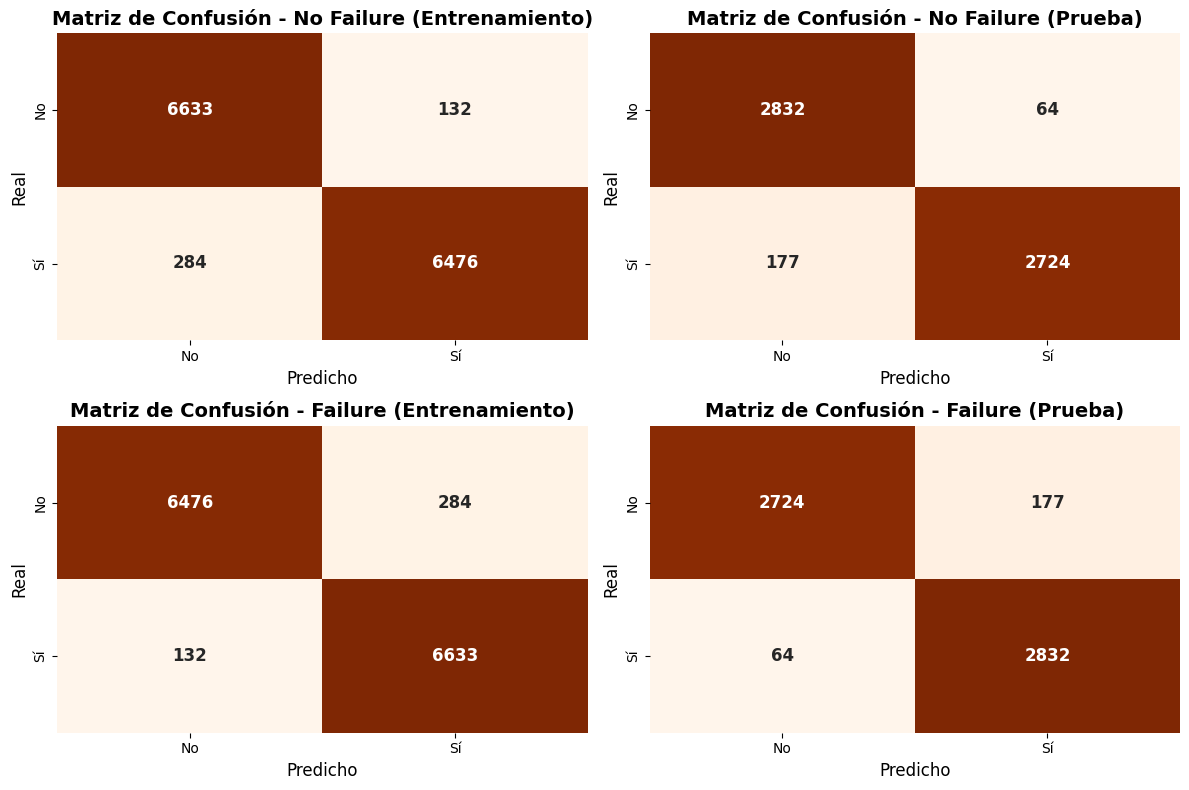

In [ ]:
# Diccionario de nombres de clases para este modelo
clase_nombres_uno = {
    0: "No Failure",
    1: "Failure"
}

clases_uno = np.unique(y_test_c_uno)

fig, axes = plt.subplots(len(clases_uno), 2, figsize=(12, len(clases_uno) * 4))

for i, clase in enumerate(clases_uno):
    cm_train_uno = confusion_matrix(y_train_c_uno == clase, y_train_pred_c_uno == clase)
    cm_test_uno = confusion_matrix(y_test_c_uno == clase, y_test_pred_c_uno == clase)

    nombre_clase_uno = clase_nombres_uno.get(clase, f"Clase {clase}")

    # Gráfico de entrenamiento
    sns.heatmap(cm_train_uno, annot=True, fmt='d', cmap='Oranges', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'], ax=axes[i, 0], cbar=False, annot_kws={'size': 12, 'weight': 'bold'})
    axes[i, 0].set_title(f'Matriz de Confusión - {nombre_clase_uno} (Entrenamiento)', fontsize=14, fontweight='bold')
    axes[i, 0].set_xlabel('Predicho', fontsize=12)
    axes[i, 0].set_ylabel('Real', fontsize=12)

    # Gráfico de prueba
    sns.heatmap(cm_test_uno, annot=True, fmt='d', cmap='Oranges', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'], ax=axes[i, 1], cbar=False, annot_kws={'size': 12, 'weight': 'bold'})
    axes[i, 1].set_title(f'Matriz de Confusión - {nombre_clase_uno} (Prueba)', fontsize=14, fontweight='bold')
    axes[i, 1].set_xlabel('Predicho', fontsize=12)
    axes[i, 1].set_ylabel('Real', fontsize=12)

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()


### Curva de aprendizaje

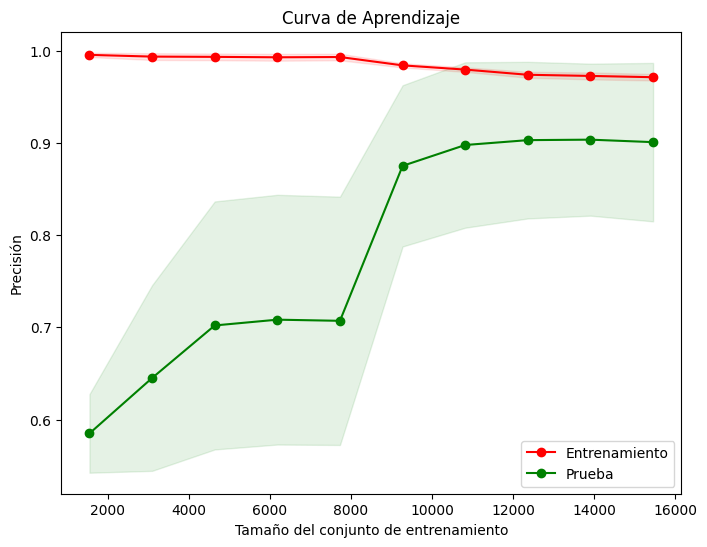

In [ ]:
from sklearn.model_selection import learning_curve

# Curva de aprendizaje
def plot_learning_curve(model, x_clasificacion_smote, y_clasificacion_smote):
    train_sizes, train_scores, test_scores = learning_curve(model, x_clasificacion_smote, y_clasificacion_smote, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Entrenamiento")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Prueba")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Precisión")
    plt.title("Curva de Aprendizaje")
    plt.legend()
    plt.show()

# Generar la curva de aprendizaje
plot_learning_curve(modelo_rf_c_uno, x_clasificacion_smote_uno_rf, y_clasificacion_smote_uno_rf)

## **Modelo Clasificación - Tipo de Falla**

### Seleccion y división de features

In [ ]:
# Separamos nuestro target de nuestras features para hacerle smote por separado.
x_clasificacion_dos_rf = data.drop(columns=['Failure Type', 'Target'])
y_clasificacion_dos_rf = data['Failure Type']  # Variable objetivo

# Donde las siguientes variables se mapearon quedando de tal forma.
"""
    "No Failure": 1,
    "Heat Dissipation Failure": 2,
    "Power Failure": 3,
    "Overstrain Failure": 4,
    "Tool Wear Failure": 5,
    "Random Failures": 6

"""

'\n    "No Failure": 1,\n    "Heat Dissipation Failure": 2,\n    "Power Failure": 3,\n    "Overstrain Failure": 4,\n    "Tool Wear Failure": 5,\n    "Random Failures": 6\n\n'

### Smote

In [ ]:
# Aplicar SMOTE
smote_dos_rf = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled_dos_rf, y_resampled_dos_rf = smote_dos_rf.fit_resample(x_clasificacion_dos_rf, y_clasificacion_dos_rf)

# Convertir de nuevo a DataFrame
data_resampled_dos_rf = pd.DataFrame(x_resampled_dos_rf, columns=x_clasificacion_dos_rf.columns)
data_resampled_dos_rf['Target'] = y_resampled_dos_rf

# Verificar el balance después de aplicar SMOTE
print(data_resampled_dos_rf['Target'].value_counts())


x_clasificacion_smote_dos_rf = data_resampled_dos_rf.drop(columns=['Target'])
y_clasificacion_smote_dos_rf = data_resampled_dos_rf['Target']


Target
1    9652
3    9652
5    9652
4    9652
6    9652
2    9652
Name: count, dtype: int64


In [ ]:
# tamaño con SMOTE
data_resampled_dos_rf.shape

(57912, 7)

### *Division de data*

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train_c_dos, X_test_c_dos, y_train_c_dos, y_test_c_dos = train_test_split(
    x_clasificacion_smote_dos_rf, y_clasificacion_smote_dos_rf, test_size=0.3, random_state=42
)

### *Instancia y creación del modelo*

In [ ]:
# Crear el modelo Random Forest
modelo_rf_c_dos = RandomForestClassifier(
    n_estimators=75,   # Reduce el número de árboles
    max_depth=10,      # Limita la profundidad de los árboles
    min_samples_split=5,  # Evita divisiones con muy pocos datos
    min_samples_leaf=3,   # Cada hoja debe tener al menos 3 muestras
    max_features='sqrt',  # Reduce las características usadas en cada división
    random_state=42
)

### *Entrenamiento del modelo*

In [ ]:
# Entrenar el modelo
modelo_rf_c_dos.fit(X_train_c_dos, y_train_c_dos)


RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=75, random_state=42)

### *Predicciones*

In [ ]:
# Predecir con el modelo en entrenamiento y prueba
y_train_pred_c_rf_dos = modelo_rf_c_dos.predict(X_train_c_dos)
y_test_pred_c_rf_dos = modelo_rf_c_dos.predict(X_test_c_dos)

### *Metricas*

In [ ]:
# Diccionario con los mensajes correspondientes
failure_messages = {
    1: "No Failure",
    2: "Heat Dissipation Failure",
    3: "Power Failure",
    4: "Overstrain Failure",
    5: "Tool Wear Failure",
    6: "Random Failures"
}

# Evaluar el modelo en entrenamiento
accuracy_train_c_dos = accuracy_score(y_train_c_dos, y_train_pred_c_rf_dos)
print("Entrenamiento:")
print(f"  Accuracy: {accuracy_train_c_dos:.4f}")
# Reemplazar los números de clase por los mensajes
train_report = classification_report(y_train_c_dos, y_train_pred_c_rf_dos, target_names=[failure_messages[i] for i in range(1, 7)])
print(train_report)

# Evaluar el modelo en prueba
accuracy_test_c_dos = accuracy_score(y_test_c_dos, y_test_pred_c_rf_dos)
print("\nPrueba:")
print(f"  Accuracy: {accuracy_test_c_dos:.4f}")
# Reemplazar los números de clase por los mensajes
test_report = classification_report(y_test_c_dos, y_test_pred_c_rf_dos, target_names=[failure_messages[i] for i in range(1, 7)])
print(test_report)


Entrenamiento:
  Accuracy: 0.9680
                          precision    recall  f1-score   support

              No Failure       0.99      0.83      0.90      6686
Heat Dissipation Failure       0.99      1.00      1.00      6801
           Power Failure       1.00      1.00      1.00      6803
      Overstrain Failure       0.99      1.00      0.99      6714
       Tool Wear Failure       0.95      0.99      0.97      6773
         Random Failures       0.90      0.98      0.94      6761

                accuracy                           0.97     40538
               macro avg       0.97      0.97      0.97     40538
            weighted avg       0.97      0.97      0.97     40538


Prueba:
  Accuracy: 0.9624
                          precision    recall  f1-score   support

              No Failure       0.98      0.81      0.89      2966
Heat Dissipation Failure       0.99      1.00      0.99      2851
           Power Failure       0.99      1.00      1.00      2849
      Over

In [ ]:
import csv
from sklearn.metrics import accuracy_score, classification_report

# Diccionario con los mensajes correspondientes
failure_messages = {
    1: "No Failure",
    2: "Heat Dissipation Failure",
    3: "Power Failure",
    4: "Overstrain Failure",
    5: "Tool Wear Failure",
    6: "Random Failures"
}

# Evaluar el modelo en entrenamiento
accuracy_train_c_dos = accuracy_score(y_train_c_dos, y_train_pred_c_rf_dos)
train_report = classification_report(y_train_c_dos, y_train_pred_c_rf_dos, target_names=[failure_messages[i] for i in range(1, 7)], output_dict=True)

# Evaluar el modelo en prueba
accuracy_test_c_dos = accuracy_score(y_test_c_dos, y_test_pred_c_rf_dos)
test_report = classification_report(y_test_c_dos, y_test_pred_c_rf_dos, target_names=[failure_messages[i] for i in range(1, 7)], output_dict=True)

# Crear la estructura del CSV
resultados = [
    ["Conjunto", "Clasificación", "Valor", "Clasificación2"],  # Título de las columnas
    ["Entrenamiento", "Accuracy", accuracy_train_c_dos, "N/A"]  # Accurate general (entrenamiento)
]

# Agregar métricas de clasificación para entrenamiento
for label in failure_messages.values():
    train_metrics = train_report[label]
    resultados.append(["Entrenamiento", label, train_metrics["f1-score"], "Clasificación2"])

# Agregar las métricas de prueba
resultados.append(["Prueba", "Accuracy", accuracy_test_c_dos, "N/A"])

for label in failure_messages.values():
    test_metrics = test_report[label]
    resultados.append(["Prueba", label, test_metrics["f1-score"], "Clasificación2"])

# Escribir los resultados en un archivo CSV
with open('resultados_clasificacion2.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(resultados)

print("Los resultados se han guardado en 'resultados_clasificacion2.csv'.")

Los resultados se han guardado en 'resultados_clasificacion2.csv'.


### Grafica

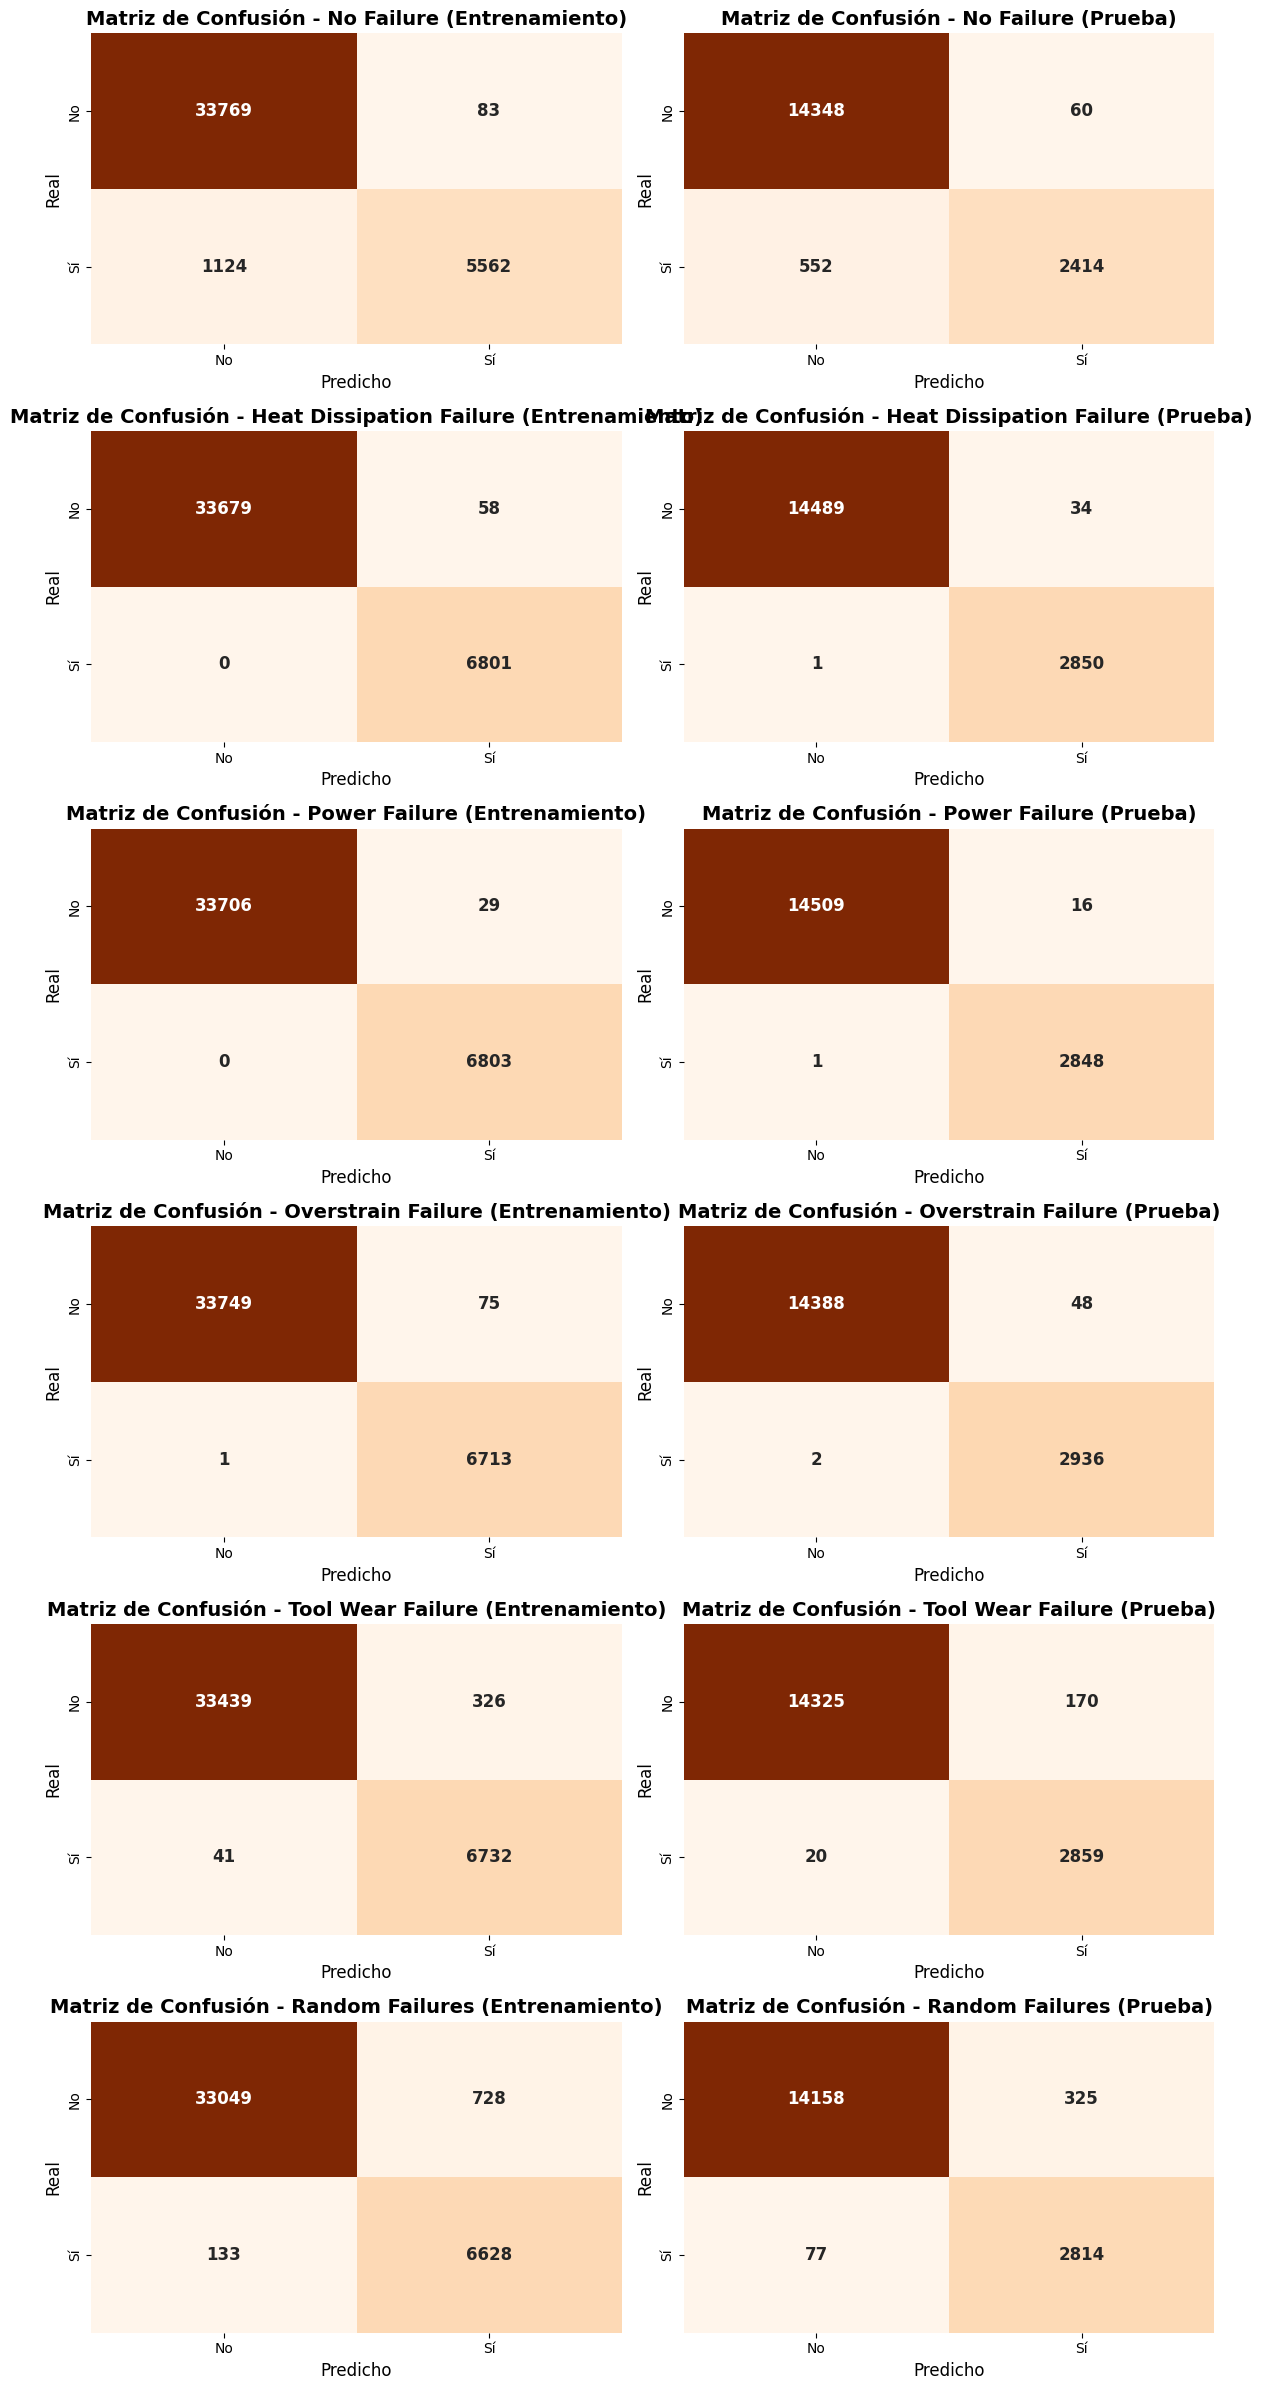

In [ ]:
# Diccionario de clases con sus nombres específicos para este modelo
clase_nombres_dos = {
    1: "No Failure",
    2: "Heat Dissipation Failure",
    3: "Power Failure",
    4: "Overstrain Failure",
    5: "Tool Wear Failure",
    6: "Random Failures"
}

clases_dos = np.unique(y_test_c_dos)

fig, axes = plt.subplots(len(clases_dos), 2, figsize=(12, len(clases_dos) * 4))

for i, clase in enumerate(clases_dos):
    cm_train_dos = confusion_matrix(y_train_c_dos == clase, y_train_pred_c_rf_dos == clase)
    cm_test_dos = confusion_matrix(y_test_c_dos == clase, y_test_pred_c_rf_dos == clase)

    nombre_clase_dos = clase_nombres_dos.get(clase, f"Clase {clase}")

    # Gráfico de entrenamiento
    sns.heatmap(cm_train_dos, annot=True, fmt='d', cmap='Oranges', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'], ax=axes[i, 0], cbar=False, annot_kws={'size': 12, 'weight': 'bold'})
    axes[i, 0].set_title(f'Matriz de Confusión - {nombre_clase_dos} (Entrenamiento)', fontsize=14, fontweight='bold')
    axes[i, 0].set_xlabel('Predicho', fontsize=12)
    axes[i, 0].set_ylabel('Real', fontsize=12)

    # Gráfico de prueba
    sns.heatmap(cm_test_dos, annot=True, fmt='d', cmap='Oranges', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'], ax=axes[i, 1], cbar=False, annot_kws={'size': 12, 'weight': 'bold'})
    axes[i, 1].set_title(f'Matriz de Confusión - {nombre_clase_dos} (Prueba)', fontsize=14, fontweight='bold')
    axes[i, 1].set_xlabel('Predicho', fontsize=12)
    axes[i, 1].set_ylabel('Real', fontsize=12)

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()


### Curva de Aprendizaje

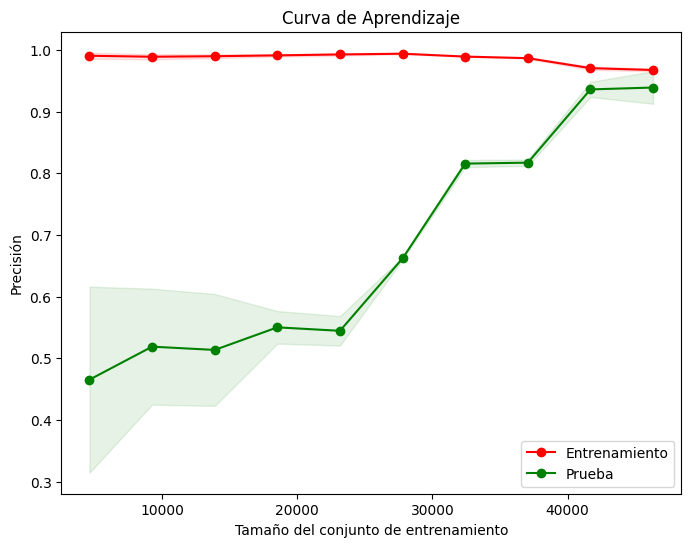

In [ ]:
from sklearn.model_selection import learning_curve

# Curva de aprendizaje
def plot_learning_curve(model, x_clasificacion_smote, y_clasificacion_smote):
    train_sizes, train_scores, test_scores = learning_curve(model, x_clasificacion_smote, y_clasificacion_smote, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Entrenamiento")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Prueba")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Precisión")
    plt.title("Curva de Aprendizaje")
    plt.legend()
    plt.show()

# Generar la curva de aprendizaje
plot_learning_curve(modelo_rf_c_dos, x_clasificacion_smote_dos_rf, y_clasificacion_smote_dos_rf)

## **Modelo Clustering**

El objetivo del clustering con K-Means es agrupar las máquinas según las características principales (como rotación, torque y temperaturas) obtenidas mediante PCA. Esto nos ayuda a identificar patrones de fallas y mejorar los modelos predictivos.


### *Separacion de Features*

In [ ]:
# Seleccionar características numéricas relevantes
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
X = data[features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### *Silhouette Score*

k=2 - Silhouette Score: 0.2366
k=3 - Silhouette Score: 0.2620
k=4 - Silhouette Score: 0.2337
k=5 - Silhouette Score: 0.2301
k=6 - Silhouette Score: 0.2223
k=7 - Silhouette Score: 0.2224
k=8 - Silhouette Score: 0.2196
k=9 - Silhouette Score: 0.2247


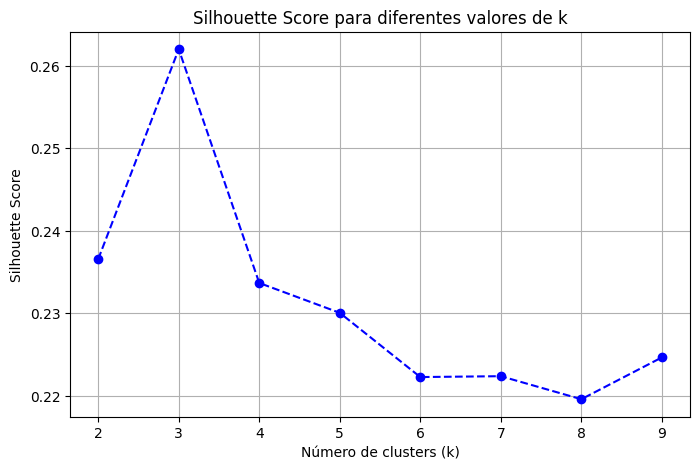

In [ ]:
# Evaluar diferentes valores de k
silhouette_scores = []
k_range = range(2, 10)  # Evaluamos de k=2 a k=9
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k} - Silhouette Score: {score:.4f}")

# Graficar el Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title("Silhouette Score para diferentes valores de k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_range)
plt.grid(True)
plt.show()


"Se evaluaron distintos valores de k con el Silhouette Score, que mide la cohesión y separación de los clusters. El valor k=3 obtuvo el mejor puntaje (0.2620), indicando que los clusters están mejor definidos en comparación con otros valores de k."

### PCA

In [ ]:
# Reducir la dimensionalidad con PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Mostrar las cargas (componentes principales)
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2', 'PC3'])
print("Cargas de las Componentes Principales:")
print(pca_components)

# Mostrar la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("\nVarianza Explicada por Componente:")
print(explained_variance)

Cargas de las Componentes Principales:
     Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
PC1             0.370281                 0.369950                0.603724   
PC2             0.602200                 0.602404               -0.368031   
PC3            -0.015282                -0.015696               -0.002976   

     Torque [Nm]  Tool wear [min]  
PC1    -0.601113         0.014489  
PC2     0.372471         0.016809  
PC3     0.002036         0.999754  

Varianza Explicada por Componente:
[0.38662133 0.37103922 0.19991253]


#### PC1

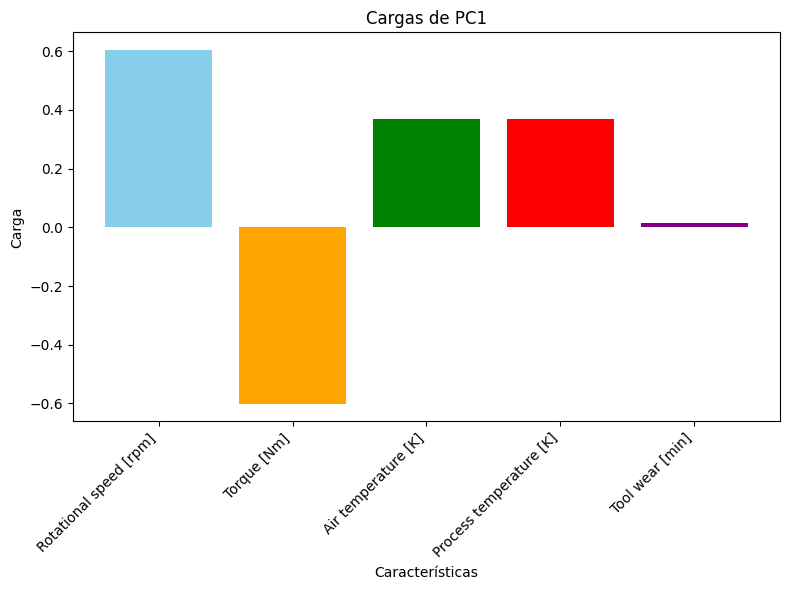

In [ ]:
# Extraer las cargas de PC1
pc1_loadings = pca_components.loc['PC1'][['Rotational speed [rpm]', 'Torque [Nm]', 'Air temperature [K]', 'Process temperature [K]', 'Tool wear [min]']]

# Crear gráfico de barras para PC1
plt.figure(figsize=(8, 6))
plt.bar(pc1_loadings.index, pc1_loadings.values, color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Cargas de PC1')
plt.ylabel('Carga')
plt.xlabel('Características')

# Rotar las etiquetas del eje x para mejorar la visibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

PC1: Captura la variabilidad relacionada con la velocidad de rotación y el torque, resaltando diferencias en el rendimiento mecánico.




#### PC2

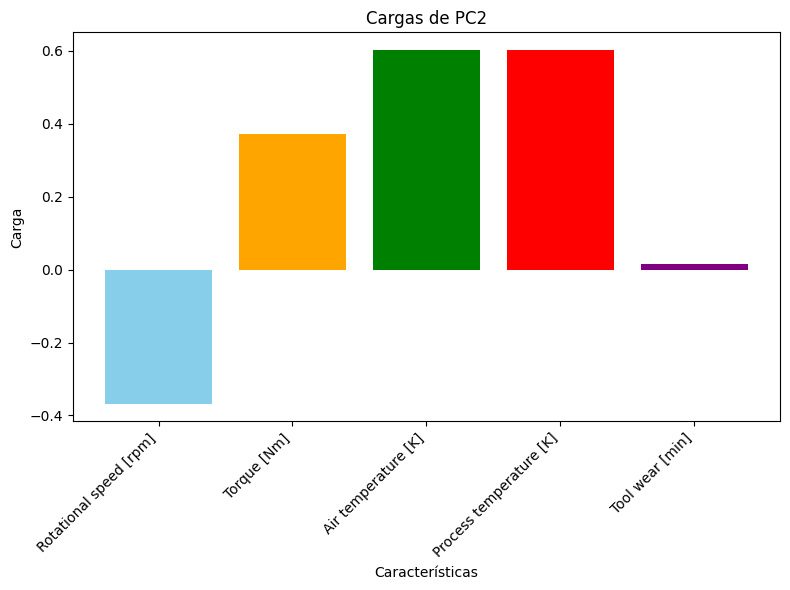

In [ ]:
# Extraer las cargas de PC2
pc2_loadings = pca_components.loc['PC2'][['Rotational speed [rpm]', 'Torque [Nm]', 'Air temperature [K]', 'Process temperature [K]', 'Tool wear [min]']]

# Crear gráfico de barras para PC2
plt.figure(figsize=(8, 6))
plt.bar(pc2_loadings.index, pc2_loadings.values, color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Cargas de PC2')
plt.ylabel('Carga')
plt.xlabel('Características')

# Rotar las etiquetas del eje x para mejorar la visibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


*PC2: Se enfoca en las diferencias de temperatura, diferenciando registros según las condiciones térmicas.*

#### PC3

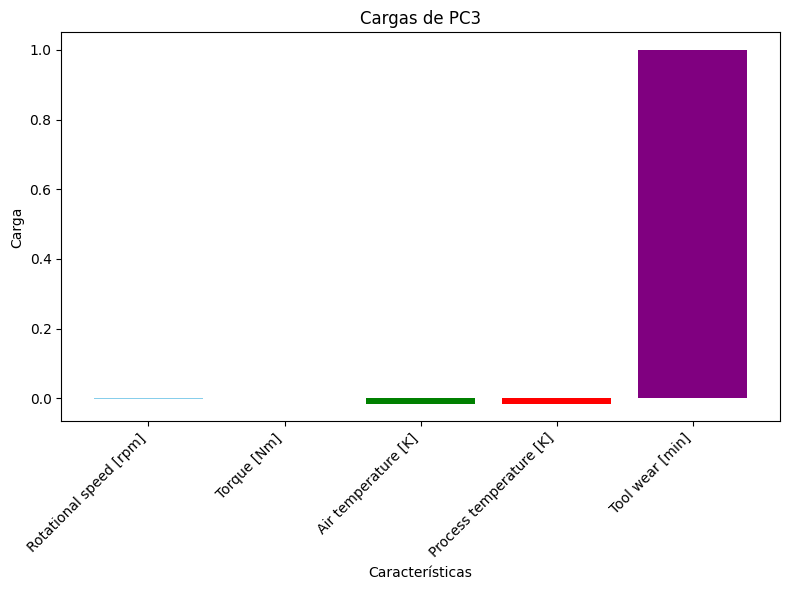

In [ ]:
# Extraer las cargas de PC3
pc3_loadings = pca_components.loc['PC3'][['Rotational speed [rpm]', 'Torque [Nm]', 'Air temperature [K]', 'Process temperature [K]', 'Tool wear [min]']]

# Crear gráfico de barras para PC3
plt.figure(figsize=(8, 6))
plt.bar(pc3_loadings.index, pc3_loadings.values, color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Cargas de PC3')
plt.ylabel('Carga')
plt.xlabel('Características')

# Rotar las etiquetas del eje x para mejorar la visibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

PC3: Está fuertemente ligada al desgaste de la herramienta, siendo clave para identificar la necesidad de mantenimiento.

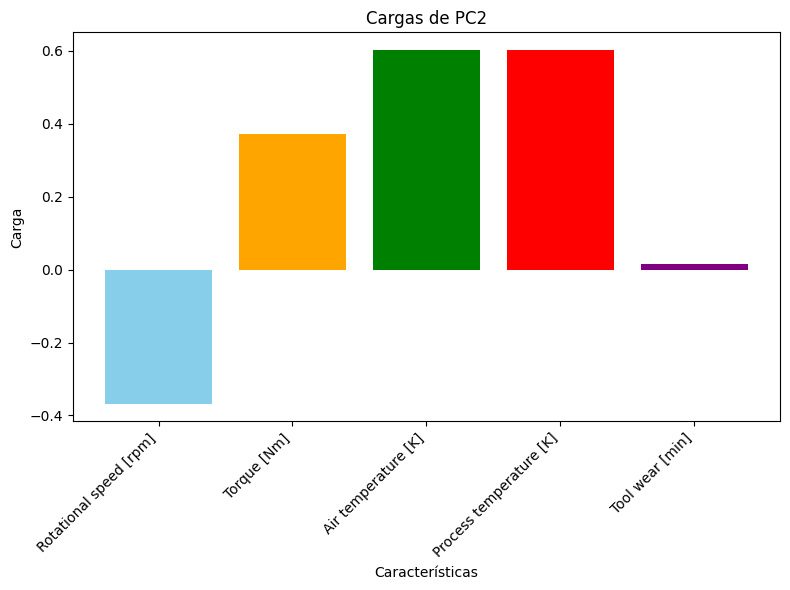

In [ ]:
# Extraer las cargas de PC2
pc2_loadings = pca_components.loc['PC2'][['Rotational speed [rpm]', 'Torque [Nm]', 'Air temperature [K]', 'Process temperature [K]', 'Tool wear [min]']]

# Crear gráfico de barras para PC2
plt.figure(figsize=(8, 6))
plt.bar(pc2_loadings.index, pc2_loadings.values, color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Cargas de PC2')
plt.ylabel('Carga')
plt.xlabel('Características')

# Rotar las etiquetas del eje x para mejorar la visibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### *Cluster*

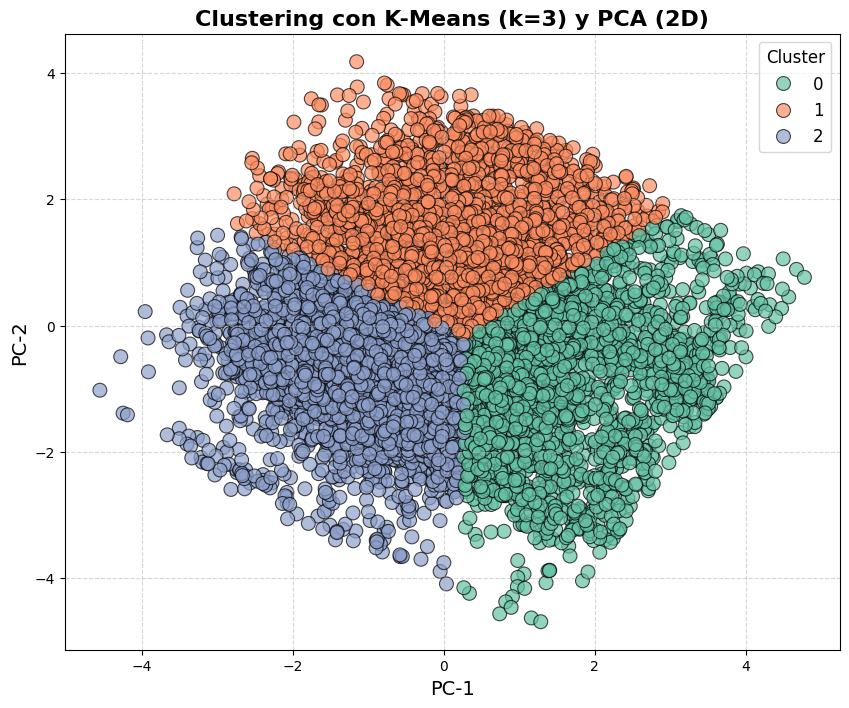

0    2454
1    3701
2    3845
Name: count, dtype: int64


In [ ]:
# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Visualizar los resultados usando PCA en 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='Set2', s=100, alpha=0.7, edgecolor='black')

# Mejorar el título y etiquetas
plt.title('Clustering con K-Means (k=3) y PCA (2D)', fontsize=16, fontweight='bold')
plt.xlabel('PC-1', fontsize=14)
plt.ylabel('PC-2', fontsize=14)

# Añadir la leyenda con título y más detalles
plt.legend(title='Cluster', title_fontsize=12, loc='upper right', fontsize=12)

# Añadir una cuadrícula para mejorar la visibilidad
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()

# Mostrar la distribución de puntos por cluster
cluster_distribution = pd.Series(labels_kmeans).value_counts().sort_index()
print(cluster_distribution)


### *Grafica 3D*

In [ ]:
# Convertir a DataFrame para facilitar la manipulación
df = pd.DataFrame(X_pca, columns=['Componente Principal 1', 'Componente Principal 2', 'Componente Principal 3'])
df['Cluster'] = labels_kmeans

# Actualizamos la paleta para 3 clusters
palette = sns.color_palette("tab10", n_colors=3)
colors = [f'rgb({int(r*255)},{int(g*255)},{int(b*255)})' for r, g, b in palette]

# Crear la figura 3D
fig = go.Figure()

# Agregar puntos para cada cluster
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Componente Principal 1'],
        y=cluster_data['Componente Principal 2'],
        z=cluster_data['Componente Principal 3'],
        mode='markers',
        marker=dict(size=4, color=colors[cluster]),
        name=f'Cluster {cluster}'
    ))

# Configurar diseño
fig.update_layout(
    title='Clustering con K-Means (k=3) y PCA (3D)',
    scene=dict(
        xaxis_title='Componente Principal 1',
        yaxis_title='Componente Principal 2',
        zaxis_title='Componente Principal 3'
    ),
    legend_title='Cluster'
)

# Mostrar la figura interactiva
fig.show()